# Data Analysis

In [ ]:
pip install scattertext

In [ ]:
%matplotlib inline
import math
import random
import scipy.stats as stats
from scipy.stats.stats import pearsonr
import seaborn as sns
from collections import defaultdict
import numpy as np
import re
import functools
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import copy
from keras.preprocessing.text import text_to_word_sequence
from nltk import WordNetLemmatizer
import sklearn.metrics as skm
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report
import nltk.corpus
from nltk.text import Text
from nltk.tokenize import TweetTokenizer
from nltk.probability import FreqDist
import nltk
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
from nltk import Counter
import re
nltk.download('words')
from nltk.corpus import words, brown
from sklearn import metrics
import os
os.nice(10)
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from sklearn.metrics import f1_score
import random
import matplotlib.pyplot as plt
import csv
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import torch
from sklearn.metrics import f1_score
import pickle
from collections import Counter
import seaborn as sns
import csv
from binhex import FInfo
from distutils.spawn import find_executable
import pandas as pd
import os
import json
from  builtins import any as b_any
from csv import writer
import matplotlib.pyplot as plt
import re
import string
import scattertext as st
import pandas as pd

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
df = pd.read_csv('Founta_NoDup.tsv', sep='\t')
df

,tweet,label
0,It is time to draw close to Him &#128591;&#127...,normal
1,if you notice me start to act different or dis...,normal
2,"Forget unfollowers, I believe in growing. 7 ne...",normal
3,@USER: Hate Being sexually Frustrated Like I w...,abusive
4,Topped the group in TGP Disc Jam Season 2! Ont...,normal
...,...,...
73189,@USER: my fucking queen URL,abusive
73190,#Osteporosis treated with #PEMF - rebuild bone...,normal
73191,@USER why does my phone screen keeps flickring...,normal
73192,#bigdata vs. #reality ... but equally applies ...,normal


In [ ]:
df.rename(columns = {'tweet':'text'}, inplace = True)
df.rename(columns = {'label':'target'}, inplace = True)
df

,text,target
0,It is time to draw close to Him &#128591;&#127...,normal
1,if you notice me start to act different or dis...,normal
2,"Forget unfollowers, I believe in growing. 7 ne...",normal
3,@USER: Hate Being sexually Frustrated Like I w...,abusive
4,Topped the group in TGP Disc Jam Season 2! Ont...,normal
...,...,...
73189,@USER: my fucking queen URL,abusive
73190,#Osteporosis treated with #PEMF - rebuild bone...,normal
73191,@USER why does my phone screen keeps flickring...,normal
73192,#bigdata vs. #reality ... but equally applies ...,normal


## distribution of the variables and categories' statistics 

In [ ]:
df['target'].value_counts()

normal     49430
abusive    19775
hateful     3989
Name: target, dtype: int64

In [ ]:
d = {'normal' : 0, 'abusive' : 1, 'hateful' : 1}
df['target'] = df['target'].map(d)
df['target'].value_counts()

0    49430
1    23764
Name: target, dtype: int64

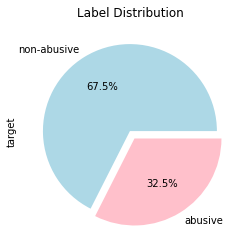

In [ ]:
labels = ['non-abusive','abusive']

df['target'].value_counts().plot(kind='pie', 
                                   title='Label Distribution',
                                   autopct='%1.1f%%',
                                   colors = ['lightblue','pink'],
                                   explode= (0, 0.1), 
                                   labels = labels
                                   )
plt.show()

## ScatterText

https://github.com/JasonKessler/scattertext, https://bhishanpdl.github.io/Projects/Twitter_Sentiment_Analysis/a03_scattertext_sentiment.html, https://towardsdatascience.com/interpreting-scattertext-a-seductive-tool-for-plotting-text-2e94e5824858

In [ ]:
dfST = df

d = {0: 'non-abusive', 1: 'abusive'}
dfST['target'] = dfST['target'].map(d)
dfST['target'].value_counts()

dfST = dfST.assign(
    parse=lambda dfST: dfST.text.apply(st.whitespace_nlp_with_sentences)
)

corpus = st.CorpusFromParsedDocuments(
    dfST,
    category_col='target', 
    parsed_col='parse'
    )

corpus = corpus.build()
corpus = corpus.get_unigram_corpus()

# reduce size
corpus = corpus.compact(st.AssociationCompactor(2000))

html = st.produce_scattertext_explorer(
    corpus,
    category='abusive',
    category_name='Abusive',
    not_category_name='Non-Abus.',
    minimum_term_frequency=0,
    pmi_threshold_coefficient=0,
    width_in_pixels=1000,
    transform=st.Scalers.dense_rank
    )

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [ ]:
with open('/content/gdrive/My Drive/Colab Notebooks/XKDD/tweets_sentiment.html', 'w') as fo:
    fo.write(html)

## linguistic analysis for abusive instances

In [ ]:
dfAbusive = df.loc[df['target'] == 1]
dfAbusive

,text,target
3,@USER: Hate Being sexually Frustrated Like I w...,1
7,@USER: If your fucking up &amp; your homies do...,1
9,@USER: That's one way he pulls you in RT@USER ...,1
10,Spotify is fucking with me URL,1
12,@USER: Im a nasty ass freak when I like you..,1
...,...,...
73173,unfollow me now because this is all im tweetin...,1
73181,I immediately regret my decision wearing a ons...,1
73183,@USER @USER @USER Coquelin is fucking garbage,1
73186,If u say baseball is boring than your an ignor...,1


In [ ]:
dfTok = TweetTokenizer()
dfs = dfAbusive["text"].apply((lambda x: dfTok.tokenize(x)))
dfString = []
for y in dfs:
  dfString += y
  dfString += ", "

In [ ]:
dfs

3        [@USER, :, Hate, Being, sexually, Frustrated, ...
7        [@USER, :, If, your, fucking, up, &, your, hom...
9        [@USER, :, That's, one, way, he, pulls, you, i...
10                   [Spotify, is, fucking, with, me, URL]
12       [@USER, :, Im, a, nasty, ass, freak, when, I, ...
                               ...                        
73173    [unfollow, me, now, because, this, is, all, im...
73181    [I, immediately, regret, my, decision, wearing...
73183    [@USER, @USER, @USER, Coquelin, is, fucking, g...
73186    [If, u, say, baseball, is, boring, than, your,...
73189                  [@USER, :, my, fucking, queen, URL]
Name: text, Length: 23764, dtype: object

In [ ]:
dfString

['@USER',
 ':',
 'Hate',
 'Being',
 'sexually',
 'Frustrated',
 'Like',
 'I',
 'wanna',
 'Fuck',
 'But',
 'ion',
 'wanna',
 'Just',
 'fuck',
 'anybody',
 ',',
 ' ',
 '@USER',
 ':',
 'If',
 'your',
 'fucking',
 'up',
 '&',
 'your',
 'homies',
 'dont',
 'tell',
 'you',
 'that',
 'your',
 'fucking',
 'up',
 ',',
 'those',
 "ain't",
 'your',
 'homies',
 ',',
 ' ',
 '@USER',
 ':',
 "That's",
 'one',
 'way',
 'he',
 'pulls',
 'you',
 'in',
 'RT',
 '@USER',
 'norman',
 'fucking',
 'reedus',
 'just',
 'threw',
 'candy',
 'at',
 'me',
 'when',
 'will',
 'your',
 'fav',
 'ever',
 '.',
 '…',
 ',',
 ' ',
 'Spotify',
 'is',
 'fucking',
 'with',
 'me',
 'URL',
 ',',
 ' ',
 '@USER',
 ':',
 'Im',
 'a',
 'nasty',
 'ass',
 'freak',
 'when',
 'I',
 'like',
 'you',
 '..',
 ',',
 ' ',
 '@USER',
 'Lol',
 ',',
 'except',
 'she',
 "didn't",
 '.',
 'Try',
 'actually',
 'reading',
 'a',
 'transcript',
 'instead',
 'of',
 'regurgitating',
 'BS',
 '..',
 ',',
 ' ',
 '@USER',
 ':',
 'can',
 'u',
 'maybe',
 'fuckin

### FreqDist

In [ ]:
fdist = FreqDist(dfString)
print(fdist)

<FreqDist with 37580 samples and 470255 outcomes>


In [ ]:
fdist.most_common(40) # da eliminare le stop words

[(',', 29776),
 (' ', 23764),
 ('@USER', 18707),
 ('URL', 10932),
 ('.', 10232),
 (':', 9175),
 ('fucking', 7836),
 ('the', 6874),
 ('!', 6849),
 ('I', 6450),
 ('a', 6254),
 ('to', 5852),
 ('you', 5007),
 ('and', 4598),
 ('is', 3959),
 ('of', 3171),
 ('?', 2953),
 ('in', 2938),
 ('my', 2921),
 ('me', 2893),
 ('that', 2803),
 ('…', 2801),
 ('"', 2522),
 ('this', 2483),
 ('up', 2273),
 ('fucked', 2273),
 ('for', 2250),
 ('it', 2175),
 ('on', 2098),
 ('like', 1938),
 ('with', 1903),
 ('so', 1901),
 ('😂', 1858),
 ('be', 1753),
 ('i', 1681),
 ('are', 1649),
 ('FUCKING', 1618),
 ('...', 1589),
 ('ass', 1578),
 ('just', 1548)]

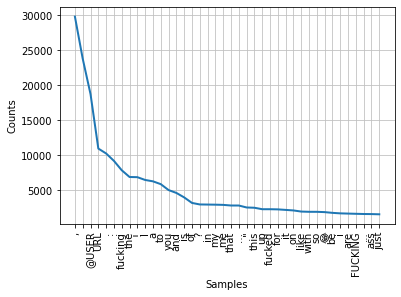

In [ ]:
fdist.plot(40,cumulative=False)
plt.show()

In [ ]:
stopWords = set(stopwords.words('english'))
punkt= [',', '.', '!', '?', '...', '-', '…', "'", "’", ':', '"']
for x in punkt:
  stopWords.add(x)
print(stopWords)

{'because', 'hadn', 'a', 'ourselves', ',', 'will', ':', 'our', 'what', 'should', 'very', 'above', 'themselves', 'than', 'were', 'again', 'their', 'weren', 'wasn', 'if', 'hers', 'into', 'on', 'any', 'it', 'she', 'does', '!', 'no', 'we', "shan't", 'have', 'shouldn', "didn't", 'haven', 'your', 'isn', '"', 'myself', "doesn't", 's', 'not', 'wouldn', 'now', "you'll", 'when', "won't", 're', 'through', 'against', 'below', "it's", 'once', 'doesn', "shouldn't", 'mightn', "isn't", 'be', 'but', 'mustn', 'can', 'y', 'ain', 'where', 'at', "weren't", 'didn', 'whom', 'had', 'most', '’', 'during', 'he', "hasn't", 'further', 'for', 'those', 'before', 'about', 'did', 'couldn', 've', 'or', 'which', 'more', "aren't", 'shan', "hadn't", 'of', 'me', 'i', 'in', 'own', 'theirs', 'too', 'they', 'while', 'been', 'll', 'my', 'do', 'won', 'there', 'o', "'", 'so', 'an', 'and', 'her', 'that', 'd', "you've", 'who', '-', 'its', 'm', 'such', 'doing', "needn't", 'with', "wouldn't", 'yourself', 'by', 'to', 'yours', 'from'

In [ ]:
filtered_sent=[]
for w in dfString:
    if w not in stopWords:
        filtered_sent.append(w)
print("Tokenized Sentence:",dfString)
print("Filtered Sentence:",filtered_sent)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
fdistNoStop = FreqDist(filtered_sent)
print(fdistNoStop)

<FreqDist with 37403 samples and 289535 outcomes>


In [ ]:
fdistNoStop.most_common(40)

[(' ', 23764),
 ('@USER', 18707),
 ('URL', 10932),
 ('fucking', 7836),
 ('I', 6450),
 ('fucked', 2273),
 ('like', 1938),
 ('😂', 1858),
 ('FUCKING', 1618),
 ('ass', 1578),
 ("I'm", 1369),
 ('hate', 1267),
 ('get', 1186),
 ('bitch', 1090),
 ('fuck', 964),
 ('&', 941),
 ('people', 899),
 ('bad', 847),
 ('u', 821),
 ('idiot', 821),
 ('shit', 813),
 ('You', 788),
 ('know', 778),
 ('stupid', 720),
 ('Fucking', 703),
 ('The', 702),
 ('got', 688),
 ('A', 671),
 ('This', 648),
 ('want', 641),
 ('️', 618),
 ('one', 610),
 ('THE', 594),
 ("can't", 584),
 ('even', 571),
 ('😭', 540),
 ('..', 539),
 ('ugly', 536),
 ('nigga', 524),
 ('go', 504)]

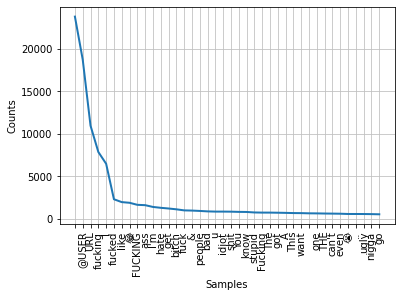

In [ ]:
fdistNoStop.plot(40,cumulative=False)
plt.show()

### Wordcloud

From this tutorial, the wordcloud: https://www.datacamp.com/community/tutorials/wordcloud-python

In [ ]:
textWordCloud = ""
for x in filtered_sent:
  textWordCloud+=x+" "

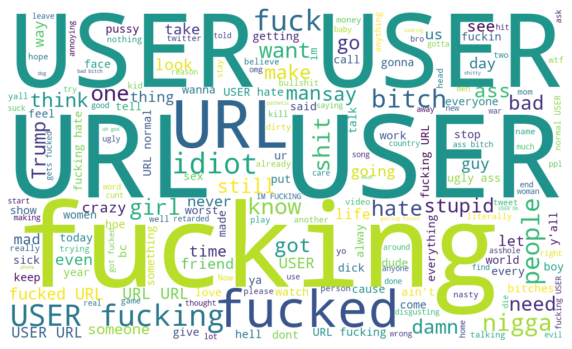

In [ ]:
wordcloud = WordCloud(background_color='white', width = 1000, height=600, margin=2).generate(textWordCloud)
plt.figure(figsize=(10,14))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## linguistic analysis for non-abusive instances

In [ ]:
dfNonAbusive = df.loc[df['target'] == 0]
dfNonAbusive

,text,target
0,It is time to draw close to Him &#128591;&#127...,0
1,if you notice me start to act different or dis...,0
2,"Forget unfollowers, I believe in growing. 7 ne...",0
4,Topped the group in TGP Disc Jam Season 2! Ont...,0
5,That daily baby aspirin for your #heart just m...,0
...,...,...
73188,Advocating for young people to grow...how dare...,0
73190,#Osteporosis treated with #PEMF - rebuild bone...,0
73191,@USER why does my phone screen keeps flickring...,0
73192,#bigdata vs. #reality ... but equally applies ...,0


In [ ]:
dfTok = TweetTokenizer()
dfs = dfNonAbusive["text"].apply((lambda x: dfTok.tokenize(x)))
dfString = []
for y in dfs:
  dfString += y
  dfString += ", "

In [ ]:
dfs

0        [It, is, time, to, draw, close, to, Him, 🙏🏻, F...
1        [if, you, notice, me, start, to, act, differen...
2        [Forget, unfollowers, ,, I, believe, in, growi...
4        [Topped, the, group, in, TGP, Disc, Jam, Seaso...
5        [That, daily, baby, aspirin, for, your, #heart...
                               ...                        
73188    [Advocating, for, young, people, to, grow, ......
73190    [#Osteporosis, treated, with, #PEMF, -, rebuil...
73191    [@USER, why, does, my, phone, screen, keeps, f...
73192    [#bigdata, vs, ., #reality, ..., but, equally,...
73193    [you, can, do, whatever, you, choose, ,, if, y...
Name: text, Length: 49430, dtype: object

In [ ]:
dfString

['It',
 'is',
 'time',
 'to',
 'draw',
 'close',
 'to',
 'Him',
 '🙏🏻',
 'Father',
 ',',
 'I',
 'draw',
 'near',
 'to',
 'you',
 'now',
 'and',
 'always',
 '❤',
 '️',
 'URL',
 ',',
 ' ',
 'if',
 'you',
 'notice',
 'me',
 'start',
 'to',
 'act',
 'different',
 'or',
 'distant',
 '..',
 "it's",
 'bc',
 'i',
 'peeped',
 'something',
 'you',
 'did',
 'or',
 'i',
 'notice',
 'a',
 'difference',
 'in',
 'how',
 'you',
 'act',
 '&',
 'ian',
 'fw',
 'it',
 '.',
 ',',
 ' ',
 'Forget',
 'unfollowers',
 ',',
 'I',
 'believe',
 'in',
 'growing',
 '.',
 '7',
 'new',
 'followers',
 'in',
 'the',
 'last',
 'day',
 '!',
 'Stats',
 'via',
 'URL',
 ',',
 ' ',
 'Topped',
 'the',
 'group',
 'in',
 'TGP',
 'Disc',
 'Jam',
 'Season',
 '2',
 '!',
 'Onto',
 'the',
 'Semi-Finals',
 '!',
 '@USER',
 'URL',
 ',',
 ' ',
 'That',
 'daily',
 'baby',
 'aspirin',
 'for',
 'your',
 '#heart',
 'just',
 'might',
 'be',
 'preventing',
 'colon',
 '#cancer',
 'too',
 '.',
 'URL',
 ',',
 ' ',
 'I',
 'liked',
 'a',
 '@USER',
 

### FreqDist

In [ ]:
fdist = FreqDist(dfString)
print(fdist)

<FreqDist with 93624 samples and 1188485 outcomes>


In [ ]:
fdist.most_common(40) # da eliminare le stop words

[(',', 71339),
 (' ', 49430),
 ('@USER', 37761),
 ('URL', 36932),
 ('.', 30178),
 ('the', 22451),
 ('to', 20545),
 ('a', 14946),
 ('I', 13351),
 ('and', 13094),
 ('!', 12305),
 ('of', 11540),
 ('…', 11330),
 ('in', 10290),
 ('you', 10035),
 ('for', 9330),
 ('is', 8918),
 (':', 8641),
 ('on', 6651),
 ('?', 6543),
 ('-', 6052),
 ('it', 5780),
 ('that', 5513),
 ('...', 5383),
 ('"', 5288),
 ('my', 5085),
 ('with', 4955),
 ('this', 4519),
 ('be', 4219),
 ('at', 3941),
 ('me', 3905),
 ('have', 3858),
 ('are', 3757),
 ('The', 3608),
 ('&', 3595),
 ('your', 3516),
 ('but', 3418),
 ('(', 3268),
 ('was', 3106),
 ('so', 3090)]

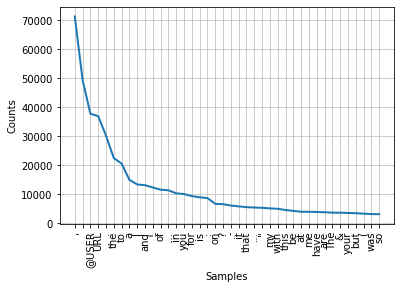

In [ ]:
fdist.plot(40,cumulative=False)
plt.show()

In [ ]:
stopWords = set(stopwords.words('english'))
punkt= [',', '.', '!', '?', '...', '-', '…', "'", "’", ':', '"']
for x in punkt:
  stopWords.add(x)
print(stopWords)

{'because', 'hadn', 'a', 'ourselves', ',', 'will', ':', 'our', 'what', 'should', 'very', 'above', 'themselves', 'than', 'were', 'again', 'their', 'weren', 'wasn', 'if', 'hers', 'into', 'on', 'any', 'it', 'she', 'does', '!', 'no', 'we', "shan't", 'have', 'shouldn', "didn't", 'haven', 'your', 'isn', '"', 'myself', "doesn't", 's', 'not', 'wouldn', 'now', "you'll", 'when', "won't", 're', 'through', 'against', 'below', "it's", 'once', 'doesn', "shouldn't", 'mightn', "isn't", 'be', 'but', 'mustn', 'can', 'y', 'ain', 'where', 'at', "weren't", 'didn', 'whom', 'had', 'most', '’', 'during', 'he', "hasn't", 'further', 'for', 'those', 'before', 'about', 'did', 'couldn', 've', 'or', 'which', 'more', "aren't", 'shan', "hadn't", 'of', 'me', 'i', 'in', 'own', 'theirs', 'too', 'they', 'while', 'been', 'll', 'my', 'do', 'won', 'there', 'o', "'", 'so', 'an', 'and', 'her', 'that', 'd', "you've", 'who', '-', 'its', 'm', 'such', 'doing', "needn't", 'with', "wouldn't", 'yourself', 'by', 'to', 'yours', 'from'

In [ ]:
filtered_sent=[]
for w in dfString:
    if w not in stopWords:
        filtered_sent.append(w)
print("Tokenized Sentence:",dfString)
print("Filtered Sentence:",filtered_sent)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
fdistNoStop = FreqDist(filtered_sent)
print(fdistNoStop)

<FreqDist with 93440 samples and 737728 outcomes>


In [ ]:
fdistNoStop.most_common(40)

[(' ', 49430),
 ('@USER', 37761),
 ('URL', 36932),
 ('I', 13351),
 ('The', 3608),
 ('&', 3595),
 ('(', 3268),
 (')', 3040),
 ('/', 2738),
 ('like', 2703),
 ("I'm", 2299),
 ('get', 1960),
 ('one', 1859),
 ('people', 1667),
 ('know', 1635),
 ('time', 1611),
 ('A', 1555),
 ('You', 1505),
 ('love', 1461),
 ('via', 1389),
 ('day', 1253),
 ('see', 1242),
 ('..', 1235),
 ('would', 1234),
 ('2', 1211),
 ('😂', 1211),
 ('This', 1199),
 ('We', 1113),
 ('good', 1109),
 ('want', 1105),
 ('think', 1101),
 ('new', 1096),
 ('today', 1037),
 ('us', 1032),
 ('go', 1032),
 ('make', 1012),
 ('If', 1002),
 ('u', 993),
 ('much', 993),
 ('back', 983)]

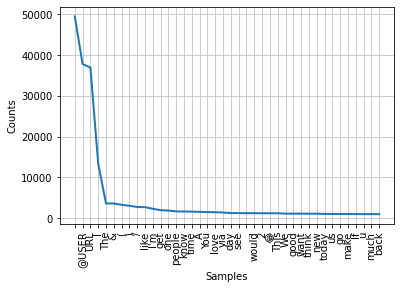

In [ ]:
fdistNoStop.plot(40,cumulative=False)
plt.show()

### Wordcloud

From this tutorial, the wordcloud: https://www.datacamp.com/community/tutorials/wordcloud-python

In [ ]:
textWordCloud = ""
for x in filtered_sent:
  textWordCloud+=x+" "

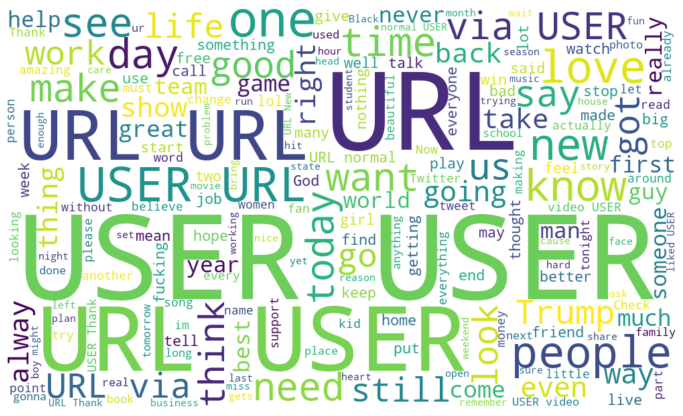

In [ ]:
wordcloud = WordCloud(background_color='white', width = 1000, height=600, margin=2).generate(textWordCloud)
plt.figure(figsize=(12,16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## linguistic analysis for AAE instances

In [ ]:
! git clone https://github.com/MartaMarchiori/twitteraae
from twitteraae.code import *
%cd twitteraae/code
import predict

In [ ]:
predict.load_model()

Output proportions are for the African-American, Hispanic, Asian, and White topics, respectively: inference of the proportion of words in the text that come from a demographically-associated language/dialect. As we state in the paper, we only consider the AA and White categories to be reliable and useful, and conducted linguistic validation only for those two categories.

As recommended,
we assign dialect labels to tweets with dialect
probabilities greater than 80%

Relaxing constraint 

In [ ]:
texts = df.text.to_list()

ids = []
for i in range(len(texts)):
  v=predict.predict(texts[i].split())
  if v is not None:
    if v[0] >= 0.7:
          ids.append(i)
print(len(ids))
dfAAE=df.loc[ids]
dfAAE=dfAAE.reset_index()
dfAAE = dfAAE.drop(['index'],True)
dfAAE

429


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':


,text,target
0,i told that lik bitch she was ugly .. i hope s...,1
1,I don't give a fuck about NONE of y'all UGLY b...,1
2,@USER: ion b mad wen a bitch get another nigga...,1
3,@USER Aye das my mans house ji like was mad a ...,1
4,@USER: Cardi B: Silly muthafucka who raised yo...,1
...,...,...
424,@USER: Twitter is ass backwards &#128553; like...,1
425,@USER She was the dopest.. mad she was a lil s...,1
426,a mad bitch ain't gone stop me from getting my...,1
427,@USER: Y'all be on here with some ugly ass tat...,0


In [ ]:
dfAAE['target'].value_counts()

1    379
0     50
Name: target, dtype: int64

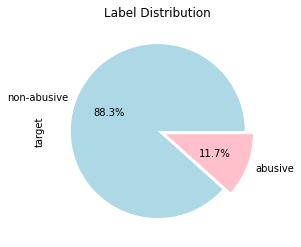

In [ ]:
labels = ['non-abusive','abusive']

dfAAE['target'].value_counts().plot(kind='pie', 
                                   title='Label Distribution',
                                   autopct='%1.1f%%',
                                   colors = ['lightblue','pink'],
                                   explode= (0, 0.1), 
                                   labels = labels
                                   )
plt.show()

In [ ]:
dfTok = TweetTokenizer()
dfs = dfAAE["text"].apply((lambda x: dfTok.tokenize(x)))
dfString = []
for y in dfs:
  dfString += y
  dfString += ", "

In [ ]:
dfs

0      [i, told, that, lik, bitch, she, was, ugly, .....
1      [I, don't, give, a, fuck, about, NONE, of, y'a...
2      [@USER, :, ion, b, mad, wen, a, bitch, get, an...
3      [@USER, Aye, das, my, mans, house, ji, like, w...
4      [@USER, :, Cardi, B, :, Silly, muthafucka, who...
                             ...                        
424    [@USER, :, Twitter, is, ass, backwards, 😩, lik...
425    [@USER, She, was, the, dopest, .., mad, she, w...
426    [a, mad, bitch, ain't, gone, stop, me, from, g...
427    [@USER, :, Y'all, be, on, here, with, some, ug...
428    [@USER, :, Y'all, be, sounding, so, damn, dumb...
Name: text, Length: 429, dtype: object

In [ ]:
dfString

['i',
 'told',
 'that',
 'lik',
 'bitch',
 'she',
 'was',
 'ugly',
 '..',
 'i',
 'hope',
 'sge',
 'aint',
 'get',
 'offended',
 '😬',
 ',',
 ' ',
 'I',
 "don't",
 'give',
 'a',
 'fuck',
 'about',
 'NONE',
 'of',
 "y'all",
 'UGLY',
 'bitches',
 'at',
 'Riverdale',
 'lmfao',
 'get',
 'mad',
 'hoe',
 ',',
 ' ',
 '@USER',
 ':',
 'ion',
 'b',
 'mad',
 'wen',
 'a',
 'bitch',
 'get',
 'another',
 'nigga',
 'i',
 'be',
 'mad',
 'wen',
 'da',
 'bitch',
 'let',
 'him',
 'do',
 'wat',
 'i',
 'do',
 '😂',
 '🤦🏾\u200d♂',
 '️',
 ',',
 ' ',
 '@USER',
 'Aye',
 'das',
 'my',
 'mans',
 'house',
 'ji',
 'like',
 'was',
 'mad',
 'a',
 'nigga',
 'was',
 'in',
 'his',
 'yard',
 'no',
 'lie',
 ',',
 ' ',
 '@USER',
 ':',
 'Cardi',
 'B',
 ':',
 'Silly',
 'muthafucka',
 'who',
 'raised',
 'you',
 '?',
 '!',
 'me',
 ':',
 'a',
 'nigga',
 'wit',
 'a',
 'pussy',
 'how',
 'disgraceful',
 '.',
 'URL',
 ',',
 ' ',
 '@USER',
 ':',
 'niggas',
 'be',
 'mad',
 'when',
 'you',
 'remind',
 'them',
 'they',
 'got',
 'a',
 'gir

### FreqDist

In [ ]:
fdist = FreqDist(dfString)
print(fdist)

<FreqDist with 1932 samples and 9057 outcomes>


In [ ]:
fdist.most_common(40) # da eliminare le stop words

[(',', 517),
 (' ', 429),
 ('@USER', 286),
 (':', 201),
 ('I', 135),
 ('!', 120),
 ('ass', 116),
 ('.', 103),
 ('😂', 96),
 ('u', 93),
 ('me', 92),
 ('a', 88),
 ('up', 84),
 ('nigga', 82),
 ('bitch', 75),
 ('niggas', 75),
 ('to', 70),
 ('mad', 69),
 ('be', 68),
 ('URL', 66),
 ("y'all", 61),
 ('my', 60),
 ('the', 60),
 ('fucked', 60),
 ('that', 59),
 ('you', 55),
 ('they', 55),
 ('on', 55),
 ('get', 53),
 ('like', 52),
 ('️', 51),
 ('got', 48),
 ('bitches', 46),
 ("ain't", 46),
 ('😭', 41),
 ('"', 41),
 ('?', 40),
 ('yo', 40),
 ('this', 39),
 ('she', 37)]

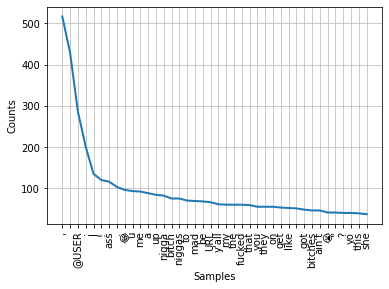

In [ ]:
fdist.plot(40,cumulative=False)
plt.show()

In [ ]:
stopWords = set(stopwords.words('english'))
punkt= [',', '.', '!', '?', '...', '-', '…', "'", "’", ':', '"']
for x in punkt:
  stopWords.add(x)
print(stopWords)

{'that', 'having', 'herself', 'only', 'into', "don't", 'needn', '’', 'll', 'nor', 'such', 'few', 'same', 'am', 'own', 'shouldn', "she's", 'any', 'which', 'm', "it's", 'had', '…', 'are', 'y', "couldn't", 'this', "weren't", "didn't", 'haven', 'if', 'down', 't', 'was', 'or', 'ours', 'not', 'during', 'at', 'their', 'were', 'can', 'its', 'have', 'hasn', 'these', 'why', 'himself', "should've", 'off', "you'll", 'until', 'there', 'couldn', 'they', 'where', 'he', '-', ',', 'both', 'she', 'doing', 'itself', 'and', 'themselves', 'being', "mustn't", 'above', "that'll", 'about', "hasn't", 'our', 'because', 'most', 'i', '...', 'each', "doesn't", 'we', 'just', 'doesn', 'isn', 'ma', 'shan', 'yourself', 'do', "you've", "you're", 'other', 'him', 'his', 'those', "mightn't", 'before', 'has', 're', 'them', 'the', 'myself', 'under', 'wasn', 'a', ':', 'more', 'out', "wouldn't", 'over', 'through', 'very', 'you', 'of', 'o', 'aren', "'", 'd', "haven't", 'ain', 'then', 'on', 'than', "you'd", 'hers', 'again', 'sh

In [ ]:
filtered_sent=[]
for w in dfString:
    if w not in stopWords:
        filtered_sent.append(w)
print("Tokenized Sentence:",dfString)
print("Filtered Sentence:",filtered_sent)

Tokenized Sentence: ['i', 'told', 'that', 'lik', 'bitch', 'she', 'was', 'ugly', '..', 'i', 'hope', 'sge', 'aint', 'get', 'offended', '😬', ',', ' ', 'I', "don't", 'give', 'a', 'fuck', 'about', 'NONE', 'of', "y'all", 'UGLY', 'bitches', 'at', 'Riverdale', 'lmfao', 'get', 'mad', 'hoe', ',', ' ', '@USER', ':', 'ion', 'b', 'mad', 'wen', 'a', 'bitch', 'get', 'another', 'nigga', 'i', 'be', 'mad', 'wen', 'da', 'bitch', 'let', 'him', 'do', 'wat', 'i', 'do', '😂', '🤦🏾\u200d♂', '️', ',', ' ', '@USER', 'Aye', 'das', 'my', 'mans', 'house', 'ji', 'like', 'was', 'mad', 'a', 'nigga', 'was', 'in', 'his', 'yard', 'no', 'lie', ',', ' ', '@USER', ':', 'Cardi', 'B', ':', 'Silly', 'muthafucka', 'who', 'raised', 'you', '?', '!', 'me', ':', 'a', 'nigga', 'wit', 'a', 'pussy', 'how', 'disgraceful', '.', 'URL', ',', ' ', '@USER', ':', 'niggas', 'be', 'mad', 'when', 'you', 'remind', 'them', 'they', 'got', 'a', 'girl', '😭', 'nigga', 'u', 'mad', 'at', 'me', 'u', 'in', 'a', 'relationship', '?', ',', ' ', '@USER', ':',

In [ ]:
fdistNoStop = FreqDist(filtered_sent)
print(fdistNoStop)

<FreqDist with 1817 samples and 6194 outcomes>


In [ ]:
fdistNoStop.most_common(40)

[(' ', 429),
 ('@USER', 286),
 ('I', 135),
 ('ass', 116),
 ('😂', 96),
 ('u', 93),
 ('nigga', 82),
 ('bitch', 75),
 ('niggas', 75),
 ('mad', 69),
 ('URL', 66),
 ("y'all", 61),
 ('fucked', 60),
 ('get', 53),
 ('like', 52),
 ('️', 51),
 ('got', 48),
 ('bitches', 46),
 ("ain't", 46),
 ('😭', 41),
 ('yo', 40),
 ('&', 36),
 ("I'm", 30),
 ('ugly', 29),
 ('wit', 29),
 ("Y'all", 26),
 ('hate', 26),
 ('💯', 25),
 ('gone', 23),
 ('crazy', 23),
 ('n', 23),
 ('bout', 22),
 ('fuck', 21),
 ('bad', 21),
 ('shit', 20),
 ('stupid', 19),
 ('say', 19),
 ('Niggas', 19),
 ('wanna', 19),
 ('everybody', 19)]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128175 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128175 missing from current font.
  font.set_text(s, 0, flags=flags)


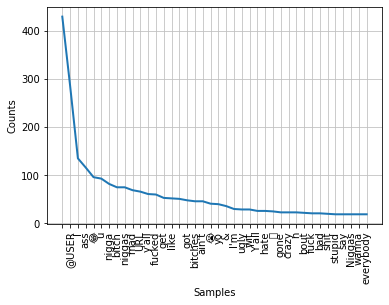

In [ ]:
fdistNoStop.plot(40,cumulative=False)
plt.show()

### Wordcloud

From this tutorial, the wordcloud: https://www.datacamp.com/community/tutorials/wordcloud-python

In [ ]:
textWordCloud = ""
for x in filtered_sent:
  textWordCloud+=x+" "

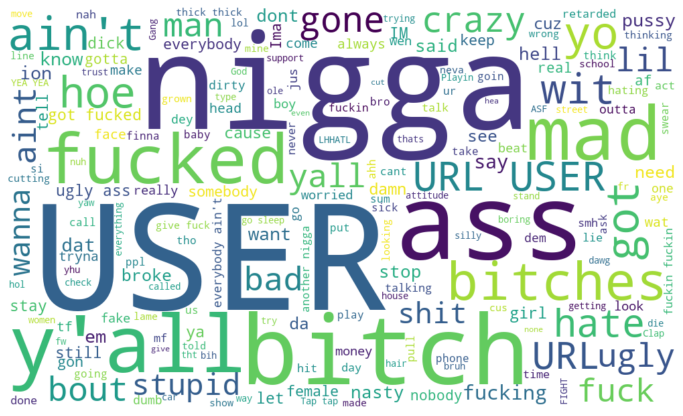

In [ ]:
wordcloud = WordCloud(background_color='white', width = 1000, height=600, margin=2).generate(textWordCloud)
plt.figure(figsize=(12,16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.20, shuffle=True, random_state=42)

In [ ]:
data = {'text':  X_train,
        'target': y_train
        }
train = pd.DataFrame(data)
train

,text,target
64007,Janie Fricke - He's A Heartache (Lookin For A ...,0
37098,@USER — going in. As soon as he saw three diff...,0
7511,@USER Yeah but didn't get drunk. It's still fu...,1
33548,Today 08/4/1941 This day 1941 British cargo sh...,0
47444,Are there topics that are off limits as a volu...,0
...,...,...
37194,GOVERNOR SAMUEL TILDEN TAMMANY HALL CANAL RING...,0
6265,JOB VACANCY: Administration Officer (Maternity...,0
54886,Sheik Tawhidi is calling on the National Imams...,0
860,"Tournament filling up, 7s, 9s, &amp; 12s are f...",0


In [ ]:
train = train.reset_index()
train = train.drop(['index'], axis = 1)
train.to_csv('train.csv', index=False)
train

,text,target
0,Janie Fricke - He's A Heartache (Lookin For A ...,0
1,@USER — going in. As soon as he saw three diff...,0
2,@USER Yeah but didn't get drunk. It's still fu...,1
3,Today 08/4/1941 This day 1941 British cargo sh...,0
4,Are there topics that are off limits as a volu...,0
...,...,...
58550,GOVERNOR SAMUEL TILDEN TAMMANY HALL CANAL RING...,0
58551,JOB VACANCY: Administration Officer (Maternity...,0
58552,Sheik Tawhidi is calling on the National Imams...,0
58553,"Tournament filling up, 7s, 9s, &amp; 12s are f...",0


In [ ]:
data = {'text':  X_test,
        'target': y_test
        }
test = pd.DataFrame(data)
test

,text,target
26446,#8: 2015 - 1 oz American Silver Eagle .999 Fin...,0
60117,"VIETNAM WAR SURPLUS CHINESE M65 GAS MASK, As u...",0
4422,Excited to announce we're one of 7 practices p...,0
49166,[TOR] 76ers lead the Raptors 29-28 at the end ...,0
31759,i'm that annoying ass bitch that laughs at eve...,1
...,...,...
63557,@USER Well since rules were changed to get thi...,0
18956,"#FollowUs at @USER &amp; @USER Media, We're wo...",0
20889,".@USER or @USER, who is your all time favourit...",0
30738,THIS IS SO CUTE OMG &#128557; #seulrene Seulgi...,0


In [ ]:
test = test.reset_index()
test = test.drop(['index'], axis = 1)
test.to_csv('test.csv', index=False)
test

,text,target
0,#8: 2015 - 1 oz American Silver Eagle .999 Fin...,0
1,"VIETNAM WAR SURPLUS CHINESE M65 GAS MASK, As u...",0
2,Excited to announce we're one of 7 practices p...,0
3,[TOR] 76ers lead the Raptors 29-28 at the end ...,0
4,i'm that annoying ass bitch that laughs at eve...,1
...,...,...
14634,@USER Well since rules were changed to get thi...,0
14635,"#FollowUs at @USER &amp; @USER Media, We're wo...",0
14636,".@USER or @USER, who is your all time favourit...",0
14637,THIS IS SO CUTE OMG &#128557; #seulrene Seulgi...,0
